<a href="https://colab.research.google.com/github/Azhar6565/Capstone-Project-1-Airbnb-Data-Analysis/blob/main/Capstone_Project_1_INDIVIDUAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>
**Explore and analyze the data to discover results and statistics for different Airbnb properties and their bookings.**


**SUMMARY**: I first decided to take up this project solely due to our mutual interest in travelling different places. I looked the data and first time making a project was very difficult for me as i am a fresher but slowly i generated my interest in given data. Doing random EDA's i built some confidence and started my project.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/Capstone Project 1/ Airbnb NYC 2019.csv'

In [ ]:
airbnb_df=pd.read_csv(file_path)

In [ ]:
# Excluding the unwanted columns from Airbnb dataframe 
airbnb_df.drop(['host_id','name','neighbourhood'],axis=1,inplace=True)

In [ ]:
#Replacing NaN values with 'Not Present'
airbnb_df.fillna('0', inplace=True)
airbnb_df.head(48895)

,id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,0,0,0,1,365
3,3831,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Sabrina,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0,0,2,9
48891,36485057,Marisol,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0,0,2,36
48892,36485431,Ilgar & Aysel,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0,0,1,27
48893,36485609,Taz,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0,0,6,2


In [ ]:
#Remove airbnb_df with 0 for price, calculated_host_listings_count, number_of_reviews, minimum_nights, reviews_per_month, 
airbnb_df = airbnb_df[airbnb_df.price > 0]
airbnb_df = airbnb_df[airbnb_df.calculated_host_listings_count > 0]
airbnb_df = airbnb_df[airbnb_df.number_of_reviews > 0]
airbnb_df = airbnb_df[airbnb_df.minimum_nights > 0]
airbnb_df = airbnb_df[airbnb_df.reviews_per_month > 0]

airbnb_df.head(48895)

,id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0
5,5099,Chris,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Rusaa,Manhattan,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,H Ai,Queens,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Ben,Staten Island,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,Blaine,Bronx,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40


**SUMMARY 1:**The very first problem i faced in my Airbnb NYC 2019.csv was unwanted columns and null values which are enemy to our data. I cleared all the unwanted columns and filled all null values with zero.

**(1)QUESTION:** **According to given data try to infer the situation where the maximum listings are done on the basis of Room type?**

In [ ]:
# Number of listings of each room type with non zero values 
# Analysing how many number of rooms are present in different room type in given data frame of airbnb
analysed_airbnb_bgraph=airbnb_df.groupby('room_type')['id'].count()
analysed_airbnb_bgraph

room_type
Entire home/apt    20331
Private room       17658
Shared room          844
Name: id, dtype: int64

Text(0.5, 0, 'room_type')

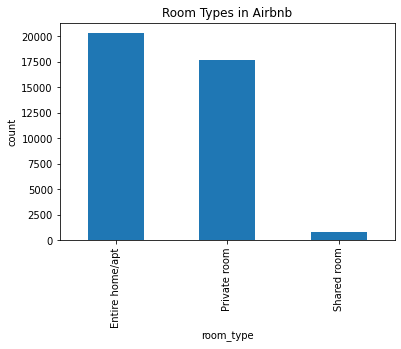

In [ ]:
#Analysing Airbnb based on room types
analysed_airbnb_bgraph.plot(kind='bar')
plt.title('Room Types in Airbnb')
plt.ylabel('count')
plt.xlabel('room_type')

INFRERENCE:
As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

**(2)QUESTION:** **Is there any noticeable difference of traffic among different areas?Why is that so?**

In [ ]:
# segregating the share of highest and lowest hotel booking in different neighbourhood areas
highest_share_of_hotels=airbnb_df['neighbourhood_group'].value_counts()
highest_share_of_hotels

Manhattan        16632
Brooklyn         16438
Queens            4574
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

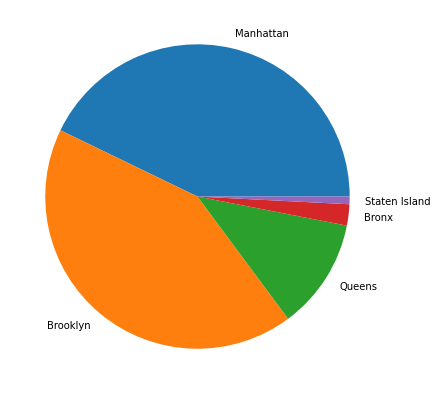

In [ ]:
# plotting pie chart for Airbnb hotel bookings 
neighbourhood_group=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']
data=[16632,16438,4574,875,314]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels =neighbourhood_group )
plt.show()

INFERENCE: The above pie chart shows that the highest share of  Airbnb bookings are near Manhattan and brooklyn are more compared to staten island, Bronx, Queens. As Manhataan and Brooklyn are situated in the heart of newyork city it seems to be more traffic at this location.

**SUMMARY 2:**Here i wanted to analyse the highest share of booking in different neighbourhood groups. First i prepared the data frame of different neighbourhood with their counts and with help of pie chart i plotted the inference.

**(3)QUESTION:** **Analyse the data and find the bookings of the property with the maximum and minimum prices with respect to neighbourhood groups and stste which neighbourhood group has maximum price?**

In [ ]:
from datetime import datetime 
from datetime import date

In [ ]:
# Minimum, Maximum and Mean prices of respective neighbourhood groups
everyday_price_df = airbnb_df.groupby('neighbourhood_group')['price'].agg([np.mean, np.min, np.max]).reset_index()
everyday_price_df

,neighbourhood_group,mean,amin,amax
0,Bronx,79.644571,20,800
1,Brooklyn,121.515209,10,10000
2,Manhattan,180.052489,10,9999
3,Queens,95.762571,10,10000
4,Staten Island,89.964968,13,625


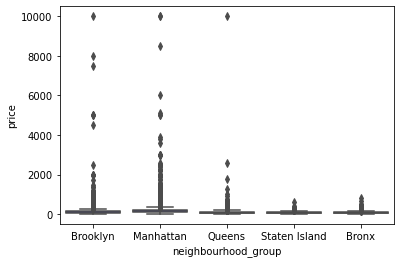

In [ ]:
# Box plot for neighbourhood and different price ranges
sns.boxplot(x = 'neighbourhood_group', y = ('price'), data = airbnb_df, color = 'blue');

INFERENCE: In above plot we can understand that property with minimum price lies in the Bronx followed by Staten Island. Manhattan has the maximum priced property followed by brooklyn and Queens neighbourhood group.

**(4)QUESTION: Find distribution of prices across different neighbourhoods on basis of room type and plot the bar graph using seaborn and also state that does prices of property differ with location.**

In [ ]:
# Distribution of prices across different neighbourhoods on basis of room type
mean_price_df = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()
mean_price_df

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,120.789644
1,Bronx,Private room,57.202677
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.270244
4,Brooklyn,Private room,73.394892
5,Brooklyn,Shared room,45.774306
6,Manhattan,Entire home/apt,230.190830
7,Manhattan,Private room,106.603265
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


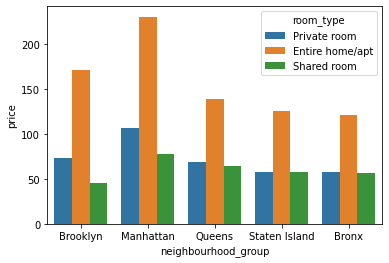

In [ ]:
# Plotting bar graph using seaborn to understand distribution of prices across different neighbourhoods
sns.barplot(x = 'neighbourhood_group', y='price', data=airbnb_df, ci= None, hue= 'room_type');

INFERENCE: In the above plot, we've tried to visualize the availability in terms of room type. Though availability based on room type is spreaded well, still we can follow a pattern where the entire stays the expensive followed by private room and shared room. In every neighbourhood group we can see shared room type is with least price. Here we can infer that prices of rooms depends on the room type and the location of city. 

**SUMMARY 3:**This is the best EDA i have done in my individual capacity. This shows the price range of room types in different neighbourhoods.

**(5)QUESTION: What can we predict from the reviews and hosts? Does highest reviews of any host helps listing the particular property? show the co-relation between neighbourhood groups and number of reviews with host name.**

In [ ]:
highest_reviews = airbnb_df[airbnb_df['number_of_reviews'] > 500]
highest_reviews[['host_name','neighbourhood_group','number_of_reviews']]

,host_name,neighbourhood_group,number_of_reviews
1879,Carol,Manhattan,540
2015,Jj,Manhattan,594
2030,Jj,Manhattan,597
2031,Jj,Manhattan,607
10623,Maya,Queens,543
11759,Dona,Queens,629
13495,Dona,Queens,576
20403,Danielle,Queens,510


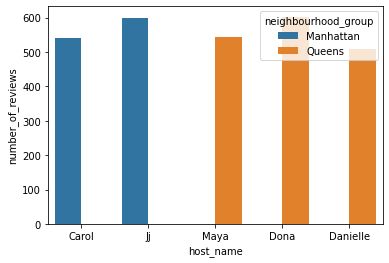

In [ ]:
# Bar plot for number of reviews to hosts in different neighbourhood groups
sns.barplot(x = 'host_name', y='number_of_reviews', data=highest_reviews, ci= None, hue= 'neighbourhood_group');

INFERENCE: Above plot states that number of reviews given to host helps the customers to book the property. As the reviews are more to the host name "Dona" in the neighbourhood group "queens" for his property, hence this infers people choose to book property with more reviews.

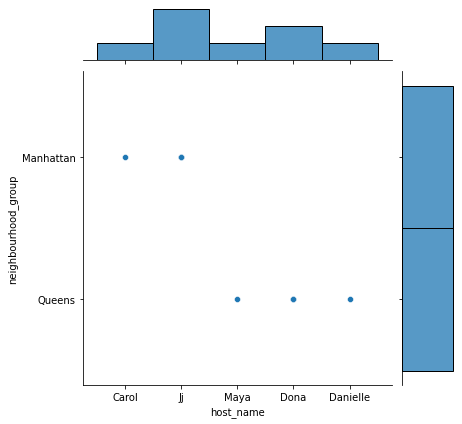

In [ ]:
# Two-way plot for number of reviews to hosts in different neighbourhoods
sns.jointplot(x='host_name', y='neighbourhood_group', data=highest_reviews);

INFERENCE: It simply states that major bookings are done looking the reviews and the neighbourhood group.

**(6)QUSTION: Using location lets find the type of property or room type where they are distributed more or less. Also get the room type which is more in numbers.**

In [ ]:
# what Room types are more in numbers
location_long_lat = airbnb_df[['room_type','neighbourhood_group','longitude','latitude']]
location_long_lat

,room_type,neighbourhood_group,longitude,latitude
0,Private room,Brooklyn,-73.97237,40.64749
1,Entire home/apt,Manhattan,-73.98377,40.75362
3,Entire home/apt,Brooklyn,-73.95976,40.68514
4,Entire home/apt,Manhattan,-73.94399,40.79851
5,Entire home/apt,Manhattan,-73.97500,40.74767
...,...,...,...,...
48782,Private room,Manhattan,-73.95366,40.78099
48790,Private room,Queens,-73.81459,40.75104
48799,Private room,Staten Island,-74.14275,40.54179
48805,Entire home/apt,Bronx,-73.92400,40.80787


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


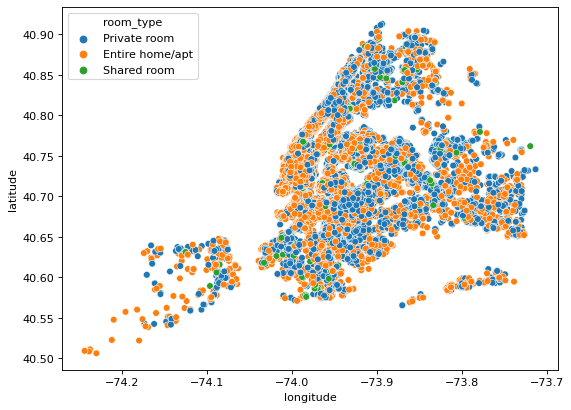

In [ ]:
# Scatter plot for room type along different locations
plt.figure(figsize=(8,6), dpi = 80)
sns.scatterplot(location_long_lat.longitude,location_long_lat.latitude,hue=location_long_lat.room_type);
plt.ioff();

INFERENCE: In above study shows that Entire home/apt is more spread across the longitude -74.0 to -73.7 and less spread in 0 to -74.2 . There are no shared rooms in longitude 0 to -74.2. We can say location is the key to book the different room types.

#Conclusion

Through this exploratory data analysis and visualization project, we gained several interesting insights into the Airbnb rental market. Below we will summarise the answers to the questions that we framed.

 **According to given data try to infer the situation where the maximum listings are done on the basis of Room type?**

 As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.

 **Is there any noticeable difference of traffic among different areas?Why is that so?**

 The above pie chart shows that the highest share of Airbnb bookings are near Manhattan and brooklyn are more compared to staten island, Bronx, Queens. As Manhataan and Brooklyn are situated in the heart of newyork city it seems to be more traffic at this location.

 **Analyse the data and find the bookings of the property with the maximum and minimum prices with respect to neighbourhood groups and stste which neighbourhood group has maximum price?**

 In above plot we can understand that property with minimum price lies in the Bronx followed by Staten Island. Manhattan has the maximum priced property followed by brooklyn and Queens neighbourhood group.

 **Find distribution of prices across different neighbourhoods on basis of room type and plot the bar graph using seaborn and also state that does prices of property differ with location.**

 In the above plot, we've tried to visualize the availability in terms of room type. Though availability based on room type is spreaded well, still we can follow a pattern where the entire stays the expensive followed by private room and shared room. In every neighbourhood group we can see shared room type is with least price. Here we can infer that prices of rooms depends on the room type and the location of city.


**** What can we predict from the reviews and hosts? Does highest reviews of any host helps listing the particular property? show the co-relation between neighbourhood groups and number of reviews with host name.****

Above plot states that number of reviews given to host helps the customers to book the property. As the reviews are more to the host name "Dona" in the neighbourhood group "queens" for his property, hence this infers people choose to book property with more reviews.

**Using location lets find the type of property or room type where they are distributed more or less. Also get the room type which is more in numbers.**

 In above study shows that Entire home/apt is more spread across the longitude -74.0 to -73.7 and less spread in 0 to -74.2 . There are no shared rooms in longitude 0 to -74.2. We can say location is the key to book the different room types.Prices are higher for rentals closer to city hotspots.

#LIMITATIONS

We did not have data for specific rooms and different amenities and hence could not compare booking based on different amenities and specific rooms(eg.Bedroom, living rooms, dinning area or swimming pool. Hence, there was an assumption made, particularly in the room type and location section of the report to understand the booking trends.

There was random sampling done while performing the user review analysis due to data limitations. We assume that our random sample is representative of the whole population. Also we assumed room type with all amenities present within.

There were certain features such as price, number of reviews and availability  that either contained missing values and some unwanted columns that was not easy to work on and hence were dropped from our analysis.

